使用随机森林模型对波士顿房价数据集进行回归建模，包括网格搜索交叉验证寻找最佳参数、决策树基模型可视化、特征重要度分析、预测结果可视化。

# 随机森林模型

![](./img/2.png)

![](./img/3.png)

![](./img/4.png)

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [38]:
housing_data = pd.read_csv('boston_house_price_english.csv')
X =  housing_data.drop(["MEDV"],axis = 1)
y = housing_data["MEDV"]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
# 从python机器学习与数据挖掘工具库sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 导入网格搜索交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到效果最好的模型
# 交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典，我们让这三个参数按列表中的顺序排列组合遍历一遍
param_grid = {
    'n_estimators':[5,10,20,50,100,200], # 决策树的个数
    'max_depth':[3,5,7], # 最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1] # 决策划分时考虑的最大特征数
}

# 实例化随机森林回归器
rf = RandomForestRegressor()

# 以随机森林回归器为基础构造网格搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)

# 在训练集上训练
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 20, 50, 100, 200], 'max_depth': [3, 5, 7], 'max_features': [0.6, 0.7, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# 选取最优参数对应的模型

In [40]:
# 查看效果最好的参数
grid.best_params_

{'max_depth': 7, 'max_features': 0.6, 'n_estimators': 100}

In [41]:
# 指定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [42]:
rf_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# 可视化其中一棵决策树

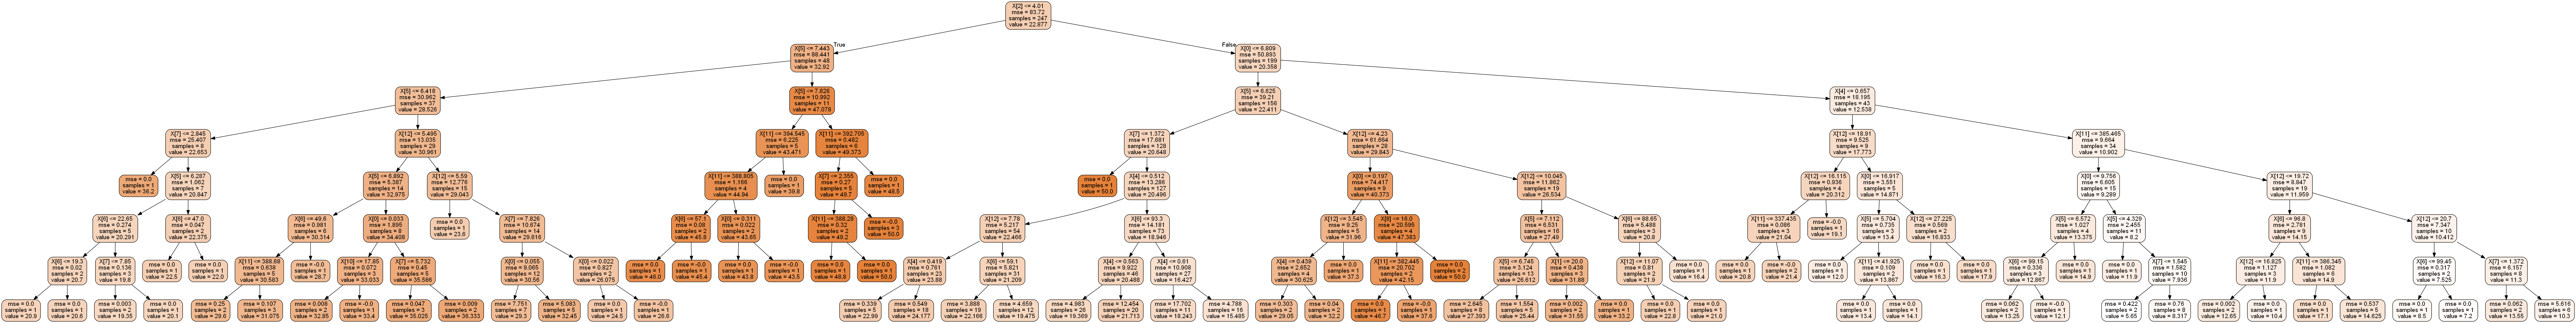

In [43]:
# 可视化决策树
from sklearn import tree
import pydotplus
from IPython.display import Image, display

# 从随机森林模型中选取一颗决策树进行可视化
estimator = rf_reg.estimators_[3]
dot_data = tree.export_graphviz(estimator,
                                out_file = None,
                                #feature_names = iris_feature_name,
                                #class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# 特征重要度分析

In [44]:
rf_reg.feature_importances_

array([0.04402386, 0.00102448, 0.04314904, 0.00167782, 0.04125151,
       0.36134937, 0.01448579, 0.03802022, 0.00367383, 0.01915708,
       0.05286561, 0.01006364, 0.36925774])

In [45]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [46]:
import numpy as np
print('特征排序：')
feature_names= X.columns
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for index in indices:
    print("feature %s (%f)" %(feature_names[index], feature_importances[index]))

特征排序：
feature LSTAT (0.369258)
feature RM (0.361349)
feature PTRATIO (0.052866)
feature CRIM (0.044024)
feature INDUS (0.043149)
feature NOX (0.041252)
feature DIS (0.038020)
feature TAX (0.019157)
feature AGE (0.014486)
feature B (0.010064)
feature RAD (0.003674)
feature CHAS (0.001678)
feature ZN (0.001024)


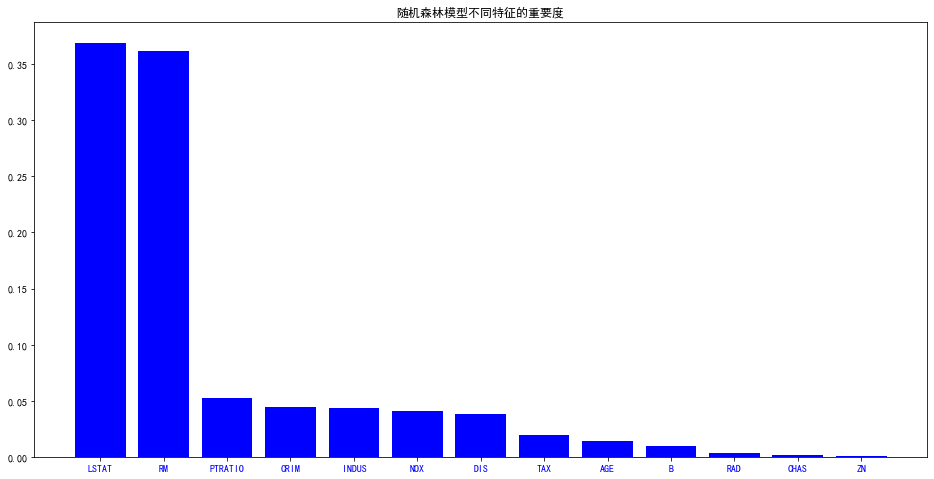

In [47]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
plt.show()

换成中文

In [26]:
import pandas as pd
df = pd.read_csv('boston_house_price_Chinese.csv',encoding='gbk')
feature_names = df.columns

In [27]:
feature_names

Index(['犯罪率', '住宅用地所占比例', '城镇中非商业用地所占比例', '是否处于查尔斯河边', '一氧化氮浓度', '住宅房间数',
       '1940年以前建成的业主自住单位的占比', '距离波士顿5个商业中心的加权平均距离', '距离高速公路的便利指数', '不动产税率',
       '学生/教师比例', '黑人比例', '低收入阶层占比', '房价中位数'],
      dtype='object')

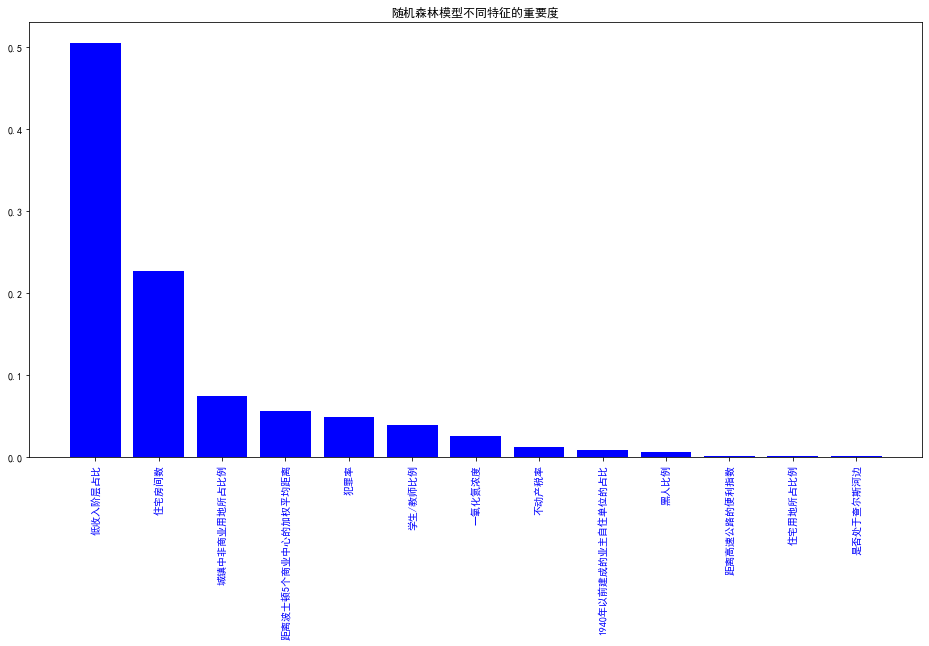

In [35]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
pl.xticks(rotation=90)
plt.show()

# 可视化测试集上的回归预测结果

In [50]:
result = {"label":y_test,"prediction":rf_reg.predict(x_test)}
result = pd.DataFrame(result)

In [54]:
result.head()

,label,prediction
329,22.6,24.035945
371,50.0,25.319693
219,23.0,21.902841
403,8.3,10.688769
78,21.2,21.184776


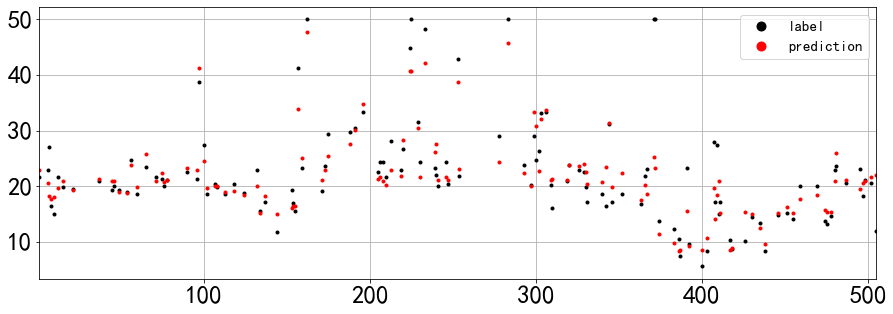

In [59]:
result['label'].plot(style='k.', figsize=(15,5))
result['prediction'].plot(style='r.')
# 设置图例文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)
# 设置坐标文字大小
plt.tick_params(labelsize=25)
# 生成刻度线网格
plt.grid()

# 计算MSE均方误差和RMSE均方根误差

In [60]:
from sklearn import metrics

In [63]:
MSE = metrics.mean_squared_error(y, rf_reg.predict(X))

In [64]:
MSE

6.819394308413826

In [65]:
np.sqrt(MSE)

2.611397003217593

# 提交结果

In [72]:
submission = {"prediction":rf_reg.predict(x_test)}
submission = pd.DataFrame(submission)

In [73]:
submission.head()

,prediction
0,24.035945
1,25.319693
2,21.902841
3,10.688769
4,21.184776


In [74]:
submission.to_csv('数据提交.csv')